# Investigating Online User Decision Process Project 

Project Showcase Notice: This code contains code and materials for the purpose of showcasing the project. Please note that sensitive and official parts of the project have been either partially or totally removed.

Purpose: The content provided here is intended to demonstrate the capabilities, design patterns, and methodologies employed in the project. It is not meant for production use and may lack certain functionalities that are part of the full, official version.

Limitations:
- **Sensitive Information**: Any sensitive information, including but not limited to private keys, credentials, and personal data, has been removed or anonymized.
- **Partial Functionality**: Some sections of the code may have been modified or omitted to ensure the security and privacy of the underlying system or data. As such, the repository may not represent the full functionality of the original project.
- **Showcase Only**: The provided code and documents are intended for viewing and demonstration purposes only.

# Import Python Package/Module and Data

In [3]:
import pandas as pd
import numpy as np

from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

In [4]:
original_df = pd.read_csv('//InternalUseOnly...csv')

In [5]:
df = original_df.copy()

# Exploratory data analysis

In [6]:
original_df.shape

(24725, 57)

In [5]:
original_df.columns

Index(['categoryR', 'countryR', 'backersR', 'fundedR', 'goalR',
       'percentage_fundedR', 'durationR', 'start_deliveryR', 'total_durationR',
       'level_pledgesR', 'new.backersR', 'existing.backersR', 'updateR',
       'yearR', 'currencyR', 'first_videoR', 'projects_launchedR',
       'projects_backedR', 'categoryrGroup', 'categoryrGroupF',
       'categoryGroupFO', 'Art', 'Comics', 'Crafts', 'Dance', 'Design',
       'Fashion', 'FilmVideo', 'Food', 'Games', 'Journalism', 'Music',
       'Photography', 'Publishing', 'Technology', 'Theater', 'fundedR.log',
       'goalR.log', 'percentage_fundedR100', 'year.2011', 'year.2012',
       'year.2013', 'year.2014', 'year.2015', 'year.2016', 'year.2017',
       'year.2018', 'year.2019', 'first_videoF', 'first_videoTrue',
       'first_videoFalse', 'projects_launchedF', 'projects_launchedYes',
       'projects_launchedNo', 'projects_backedF', 'projects_backedYes',
       'projects_backedNo'],
      dtype='object')

In [8]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24725 entries, 0 to 24724
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   categoryR              24725 non-null  object 
 1   countryR               24725 non-null  object 
 2   backersR               24725 non-null  int64  
 3   fundedR                24725 non-null  int64  
 4   goalR                  24725 non-null  float64
 5   percentage_fundedR     24725 non-null  int64  
 6   durationR              24725 non-null  int64  
 7   start_deliveryR        24725 non-null  int64  
 8   total_durationR        24725 non-null  int64  
 9   level_pledgesR         24725 non-null  int64  
 10  new.backersR           24725 non-null  int64  
 11  existing.backersR      24725 non-null  int64  
 12  updateR                24725 non-null  int64  
 13  yearR                  24725 non-null  int64  
 14  currencyR              24725 non-null  object 
 15  fi

In [6]:
original_df.head()

,categoryR,countryR,backersR,fundedR,goalR,percentage_fundedR,durationR,start_deliveryR,total_durationR,level_pledgesR,...,year.2019,first_videoF,first_videoTrue,first_videoFalse,projects_launchedF,projects_launchedYes,projects_launchedNo,projects_backedF,projects_backedYes,projects_backedNo
0,Sculpture,"Minneapolis, MN",1992,1924018,50000.0,38,30,38,68,20,...,0,True,1,0,1,1,0,1,1,0
1,Social Practice,"Seattle, WA",22840,1365105,60000.0,23,8,14,22,24,...,0,True,1,0,1,1,0,0,0,1
2,Mixed Media,"Sterling, VA",5030,1226811,38000.0,32,30,73,103,18,...,0,True,1,0,1,1,0,1,1,0
3,Art,"Fairfax, VA",3254,1068328,160000.0,7,30,56,86,14,...,0,True,1,0,1,1,0,1,1,0
4,Art,"Fairfax, VA",3290,1003874,200000.0,5,30,84,114,14,...,0,True,1,0,1,1,0,1,1,0


In [7]:
original_df.describe()

,backersR,fundedR,goalR,percentage_fundedR,durationR,start_deliveryR,total_durationR,level_pledgesR,new.backersR,existing.backersR,...,year.2018,year.2019,first_videoTrue,first_videoFalse,projects_launchedF,projects_launchedYes,projects_launchedNo,projects_backedF,projects_backedYes,projects_backedNo
count,24725.000000,2.472500e+04,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,...,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000,24725.000000
mean,955.292781,9.715229e+04,26956.475470,4.633812,32.593488,84.254843,116.848332,13.213994,265.704348,689.588433,...,0.101678,0.096825,0.920364,0.079636,0.427745,0.427745,0.572255,0.804894,0.804894,0.195106
std,3259.987999,3.555191e+05,44581.226267,19.388551,9.495772,102.128195,102.761127,8.844284,1267.624380,2196.719361,...,0.302231,0.295725,0.270734,0.270734,0.494762,0.494762,0.494762,0.396290,0.396290,0.396290
min,10.000000,1.450000e+02,108.000000,1.000000,1.000000,0.000000,5.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,1.200900e+04,7000.000000,1.000000,30.000000,18.000000,50.000000,8.000000,40.000000,47.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,269.000000,2.567000e+04,15000.000000,1.000000,30.000000,50.000000,84.000000,11.000000,92.000000,143.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,716.000000,7.669400e+04,30000.000000,3.000000,35.000000,113.000000,148.000000,16.000000,198.000000,502.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,219382.000000,2.033899e+07,950000.000000,1274.000000,60.000000,1697.000000,1736.000000,253.000000,95583.000000,123799.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualisation

### Filtering data for plotting

In [8]:
# Calculate the total number of backers for each category
total_backers_per_category = original_df.groupby('categoryrGroupF')['backersR'].sum().reset_index()

# Sort categories for better visualization
total_backers_per_category = total_backers_per_category.sort_values(by='backersR')

# Calculate the total number of backers for each combination of year and category
total_backers_per_year_category = original_df.groupby(['yearR', 'categoryrGroupF'])['backersR'].sum().reset_index()

/var/folders/pb/6_vrwxc52v961l43hsx63tsc0000gn/T/ipykernel_30287/2551958297.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_labels)


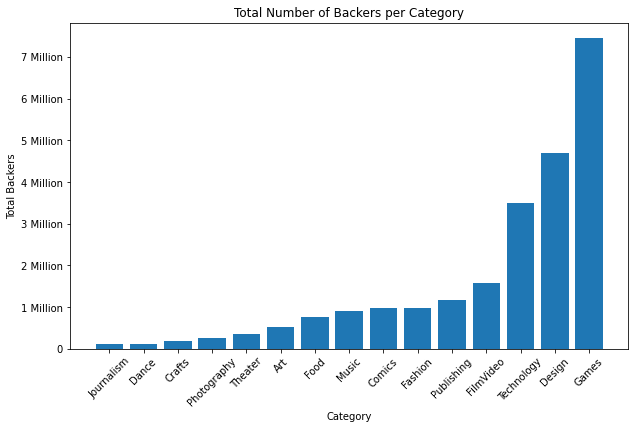

In [12]:
# Total Number of Backers per Category Plotting
# Plotting
plt.figure(figsize=(10, 6)) 
plt.bar(total_backers_per_category['categoryrGroupF'].astype(str), total_backers_per_category['backersR'])

plt.title('Total Number of Backers per Category')
plt.xlabel('Category')
plt.ylabel('Total Backers') 

plt.xticks(rotation=45)  
plt.ticklabel_format(style='plain', axis='y')  # Use plain format to avoid scientific notation

y_ticks = plt.gca().get_yticks()
y_labels = [f'{int(y/1e6)} Million' if y >= 1e6 else f'{int(y)}' for y in y_ticks]
plt.gca().set_yticklabels(y_labels)

plt.show()

/var/folders/pb/6_vrwxc52v961l43hsx63tsc0000gn/T/ipykernel_30287/2310478184.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:,.0f}' for y in ax.get_yticks()])


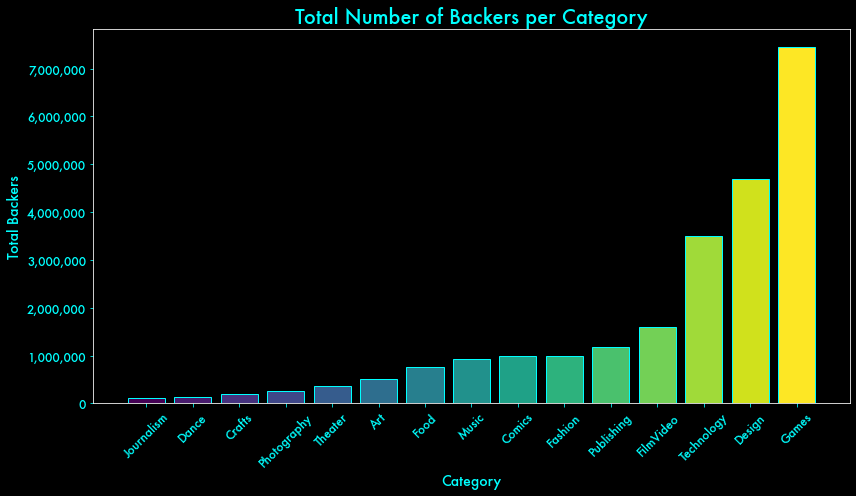

In [13]:
# Total Number of Backers per Category Plotting - Futuristc style

with plt.style.context('dark_background'):

    fig, ax = plt.subplots(figsize=(12, 7))
    colors = plt.cm.viridis(np.linspace(0, 1, len(total_backers_per_category)))
    bars = ax.bar(total_backers_per_category['categoryrGroupF'], total_backers_per_category['backersR'], color=colors, edgecolor='cyan')

    ax.set_title('Total Number of Backers per Category', fontsize=20, color='cyan', fontweight='bold', fontname='Futura')
    ax.set_xlabel('Category', fontsize=14, color='cyan', fontweight='bold', fontname='Futura')
    ax.set_ylabel('Total Backers', fontsize=14, color='cyan', fontweight='bold', fontname='Futura')

    ax.tick_params(axis='both', colors='cyan', which='both') 
    plt.xticks(rotation=45, fontsize=12, fontname='Futura')
    plt.yticks(fontsize=12, fontname='Futura')
    ax.set_yticklabels([f'{y:,.0f}' for y in ax.get_yticks()])

    for bar in bars:
        bar.set_edgecolor('cyan')
        
    plt.tight_layout()
    plt.show()


NameError: name 'ticker' is not defined

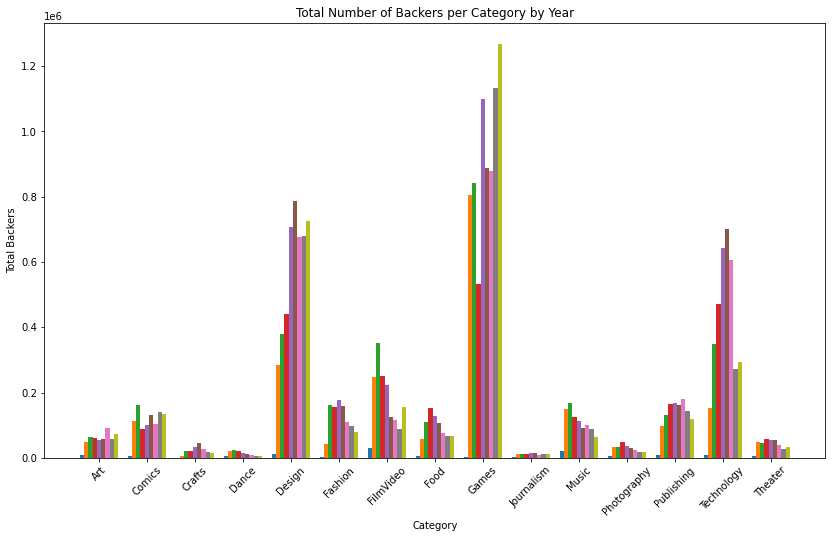

In [15]:
# Total Number of Backers per Category by Year Plotting

pivot_df = total_backers_per_year_category.pivot(index='categoryrGroupF', columns='yearR', values='backersR')

fig, ax = plt.subplots(figsize=(14, 8))

categories = pivot_df.index
years = pivot_df.columns

bar_width = 0.8 / len(years)  
index = np.arange(len(categories))  

# Plotting each year's bars
for i, year in enumerate(years):
    bars = plt.bar(index + i * bar_width, pivot_df[year], bar_width, label=str(year))

plt.title('Total Number of Backers per Category by Year')
plt.xlabel('Category')
plt.xticks(index + bar_width * (len(years) - 1) / 2, categories, rotation=45)
plt.ylabel('Total Backers')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend(title='Year', loc='upper left')
plt.tight_layout()
plt.show()


# Feature engineering and selection

In [17]:
df.columns.tolist()

['categoryR',
 'countryR',
 'backersR',
 'fundedR',
 'goalR',
 'percentage_fundedR',
 'durationR',
 'start_deliveryR',
 'total_durationR',
 'level_pledgesR',
 'new.backersR',
 'existing.backersR',
 'updateR',
 'yearR',
 'currencyR',
 'first_videoR',
 'projects_launchedR',
 'projects_backedR',
 'categoryrGroup',
 'categoryrGroupF',
 'categoryGroupFO',
 'Art',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'FilmVideo',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater',
 'fundedR.log',
 'goalR.log',
 'percentage_fundedR100',
 'year.2011',
 'year.2012',
 'year.2013',
 'year.2014',
 'year.2015',
 'year.2016',
 'year.2017',
 'year.2018',
 'year.2019',
 'first_videoF',
 'first_videoTrue',
 'first_videoFalse',
 'projects_launchedF',
 'projects_launchedYes',
 'projects_launchedNo',
 'projects_backedF',
 'projects_backedYes',
 'projects_backedNo']

In [7]:
# List of columns to keep
columns_to_keep = [
    'backersR', 'fundedR', 'goalR', 'categoryrGroupF',
    'percentage_fundedR', 'durationR', 'start_deliveryR', 'total_durationR', 
    'level_pledgesR', 'new.backersR', 'existing.backersR', 'updateR', 
    'projects_launchedR', 'projects_backedR', 'yearR', 
]

# Reduce df
df = df.loc[:, columns_to_keep]

In [8]:
# Create behavioural science naming

# Dictionary behavioural science mapping
rename_dict = {
    'percentage_fundedR': 'Herd_Behaviour',
    'durationR': '1_Present_Bias',
    'total_durationR': '2_Present_Bias',
    'projects_launchedR': '1_Commitment',
    'projects_backedR': '2_Commitment'
}

# Rename the columns in directly
df.rename(columns=rename_dict, inplace=True)

In [9]:
df.shape

(24725, 15)

In [20]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24725 entries, 0 to 24724
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   backersR           24725 non-null  int64  
 1   fundedR            24725 non-null  int64  
 2   goalR              24725 non-null  float64
 3   categoryrGroupF    24725 non-null  object 
 4   Herd_Behaviour     24725 non-null  int64  
 5   1_Present_Bias     24725 non-null  int64  
 6   start_deliveryR    24725 non-null  int64  
 7   2_Present_Bias     24725 non-null  int64  
 8   level_pledgesR     24725 non-null  int64  
 9   new.backersR       24725 non-null  int64  
 10  existing.backersR  24725 non-null  int64  
 11  updateR            24725 non-null  int64  
 12  1_Commitment       24725 non-null  int64  
 13  2_Commitment       24725 non-null  int64  
 14  yearR              24725 non-null  int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 2.8+ MB


In [62]:
# df['yearR'] = df['yearR'].astype('str')

## One-Hot Encoding
A one hot encoding allows the representation of categorical data to be numerical.

In [63]:
# One-hot encode categorical features
df = pd.get_dummies(df)
df.head(5)

,backersR,fundedR,goalR,Herd_Behaviour,1_Present_Bias,start_deliveryR,2_Present_Bias,level_pledgesR,new.backersR,existing.backersR,...,categoryrGroupF_Theater,yearR_2011,yearR_2012,yearR_2013,yearR_2014,yearR_2015,yearR_2016,yearR_2017,yearR_2018,yearR_2019
0,1992,1924018,50000.0,38,30,38,68,20,547,1445,...,0,0,0,0,0,0,1,0,0,0
1,22840,1365105,60000.0,23,8,14,22,24,10022,12818,...,0,0,0,0,0,0,0,1,0,0
2,5030,1226811,38000.0,32,30,73,103,18,1635,3395,...,0,0,0,0,1,0,0,0,0,0
3,3254,1068328,160000.0,7,30,56,86,14,790,2464,...,0,0,0,0,0,1,0,0,0,0
4,3290,1003874,200000.0,5,30,84,114,14,621,2669,...,0,0,0,0,0,0,0,1,0,0


In [64]:
print('Shape of features after one-hot encoding:', df.shape)

Shape of features after one-hot encoding: (24725, 37)


In [18]:
df.columns.tolist()

['fundedR',
 'goalR',
 'Herd_Behaviour',
 '1_Present_Bias',
 'start_deliveryR',
 '2_Present_Bias',
 'level_pledgesR',
 'new.backersR',
 'existing.backersR',
 'updateR',
 '1_Commitment',
 '2_Commitment',
 'yearR',
 'categoryrGroupF_Art',
 'categoryrGroupF_Comics',
 'categoryrGroupF_Crafts',
 'categoryrGroupF_Dance',
 'categoryrGroupF_Design',
 'categoryrGroupF_Fashion',
 'categoryrGroupF_FilmVideo',
 'categoryrGroupF_Food',
 'categoryrGroupF_Games',
 'categoryrGroupF_Journalism',
 'categoryrGroupF_Music',
 'categoryrGroupF_Photography',
 'categoryrGroupF_Publishing',
 'categoryrGroupF_Technology',
 'categoryrGroupF_Theater']

## Features and Labels

# Random Forest Regressor

In [149]:
df.shape

(24725, 37)

In [10]:
df_regress = df.copy()

# Features and lables for Random Forest Regressor

# Labels
y_regress = df_regress['backersR']

df_regress = df_regress.drop('backersR', axis = 1)

feature_list = list(df_regress.columns)

In [12]:
df_regress.shape

(24725, 14)

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_regress, y_regress, test_size=0.2, random_state=42)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (19780, 36)
Training Labels Shape: (19780,)
Testing Features Shape: (4945, 36)
Testing Labels Shape: (4945,)


In [153]:
from sklearn.ensemble import RandomForestRegressor

 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [156]:
# Predictions
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 0), 'backers.')

Mean Absolute Error: 17.0 backers.


In [157]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 99.4 %.


In [158]:
feature_list = list(X_train.columns)

importances = rf.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: existing.backersR    Importance: 0.79
Variable: new.backersR         Importance: 0.17
Variable: fundedR              Importance: 0.01
Variable: Herd_Behaviour       Importance: 0.01
Variable: goalR                Importance: 0.0
Variable: 1_Present_Bias       Importance: 0.0
Variable: start_deliveryR      Importance: 0.0
Variable: 2_Present_Bias       Importance: 0.0
Variable: level_pledgesR       Importance: 0.0
Variable: updateR              Importance: 0.0
Variable: 1_Commitment         Importance: 0.0
Variable: 2_Commitment         Importance: 0.0
Variable: categoryrGroupF_Art  Importance: 0.0
Variable: categoryrGroupF_Comics Importance: 0.0
Variable: categoryrGroupF_Crafts Importance: 0.0
Variable: categoryrGroupF_Dance Importance: 0.0
Variable: categoryrGroupF_Design Importance: 0.0
Variable: categoryrGroupF_Fashion Importance: 0.0
Variable: categoryrGroupF_FilmVideo Importance: 0.0
Variable: categoryrGroupF_Food Importance: 0.0
Variable: categoryrGroupF_Games Importanc

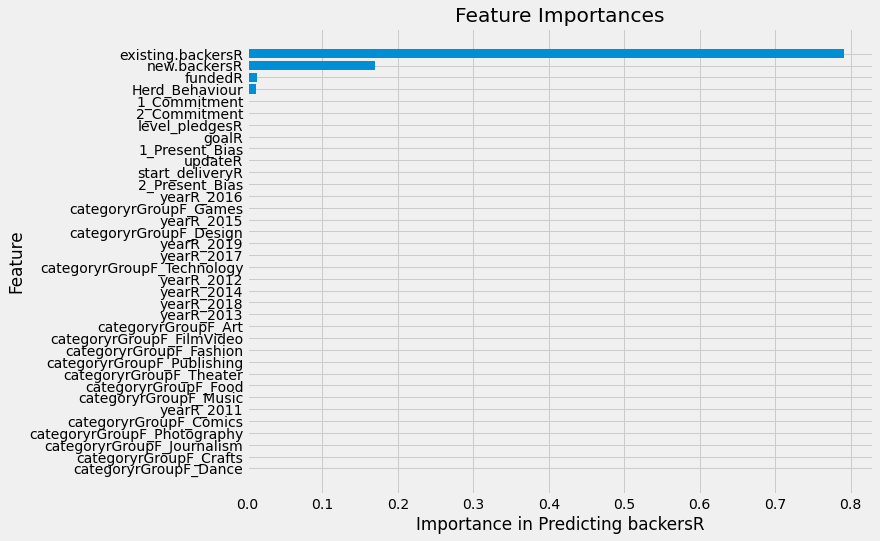

In [159]:
feature_list = list(X_train.columns)

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

sorted_feature_list = [feature_list[i] for i in indices]
sorted_importances = importances[indices]

# Plot
target_variable_name = y_regress.name
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), sorted_importances, align='center')
plt.yticks(range(len(indices)), sorted_feature_list)

plt.xlabel(f'Importance in Predicting {target_variable_name}')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


## Random forest Classifier

In [139]:
df_classifier = original_df.copy()

In [140]:
columns_to_keep = [
    'backersR', 'fundedR', 'goalR', 'categoryrGroupF',
    'percentage_fundedR', 'durationR', 'start_deliveryR', 'total_durationR', 
    'level_pledgesR', 'new.backersR', 'existing.backersR', 'updateR', 
    'projects_launchedR', 'projects_backedR',
]

f
df_classifier = df_classifier.loc[:, columns_to_keep]

# Dictionary behavioural science mapping
rename_dict = {
    'percentage_fundedR': 'Herd_Behaviour',
    'durationR': '1_Present_Bias',
    'total_durationR': '2_Present_Bias',
    'projects_launchedR': '1_Commitment',
    'projects_backedR': '2_Commitment'
}

# Rename the columns in Bdf directly
df_classifier.rename(columns=rename_dict, inplace=True)

In [141]:
df_classifier.shape

(24725, 14)

In [142]:
df_classifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24725 entries, 0 to 24724
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   backersR           24725 non-null  int64  
 1   fundedR            24725 non-null  int64  
 2   goalR              24725 non-null  float64
 3   categoryrGroupF    24725 non-null  object 
 4   Herd_Behaviour     24725 non-null  int64  
 5   1_Present_Bias     24725 non-null  int64  
 6   start_deliveryR    24725 non-null  int64  
 7   2_Present_Bias     24725 non-null  int64  
 8   level_pledgesR     24725 non-null  int64  
 9   new.backersR       24725 non-null  int64  
 10  existing.backersR  24725 non-null  int64  
 11  updateR            24725 non-null  int64  
 12  1_Commitment       24725 non-null  int64  
 13  2_Commitment       24725 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 2.6+ MB


In [143]:
# Labels
y_classifier = df_classifier['categoryrGroupF']

df_classifier = df_classifier.drop('categoryrGroupF', axis = 1)

feature_list = list(df_classifier.columns)

In [144]:
df_classifier.shape

(24725, 13)

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_classifier, y_classifier, test_size=0.2, random_state=42)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (19780, 13)
Training Labels Shape: (19780,)
Testing Features Shape: (4945, 13)
Testing Labels Shape: (4945,)


Original features: Index(['backersR', 'fundedR', 'goalR', 'Herd_Behaviour', '1_Present_Bias',
       'start_deliveryR', '2_Present_Bias', 'level_pledgesR', 'new.backersR',
       'existing.backersR', 'updateR', '1_Commitment', '2_Commitment'],
      dtype='object')

Selected features: Index(['backersR', 'fundedR', 'goalR', 'existing.backersR'], dtype='object')


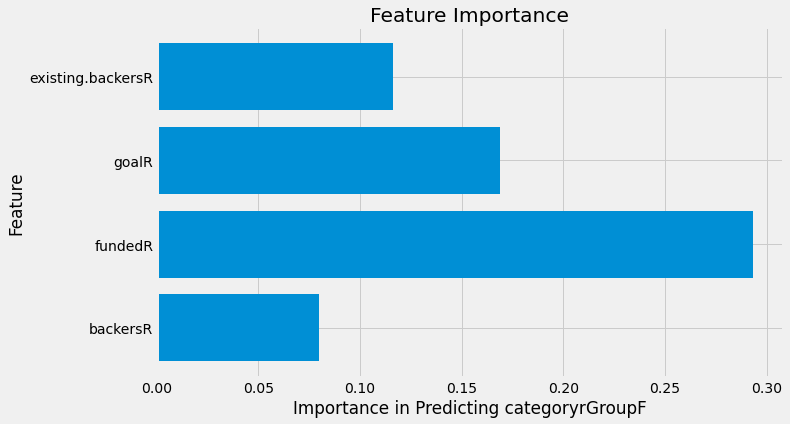

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# random forest model on training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# feature selection
model = SelectFromModel(rf, prefit=True)
X_train_transformed = model.transform(X_train)

original_features = df_classifier.columns
print(f"Original features: {original_features}")

# Select the features
features_bool = model.get_support()

selected_features = original_features[features_bool]
print(f"\nSelected features: {selected_features}")

# DataFrame for feature importance
feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})

# Plot
target_variable_name = y_classifier.name
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.xlabel(f'Importance in Predicting {target_variable_name}')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.show()


# Standardization

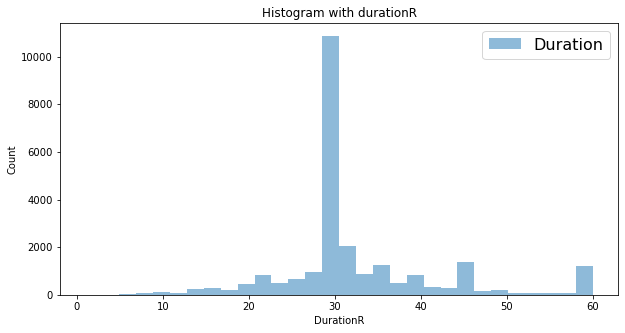

In [127]:
import matplotlib.pyplot as plt

# Orignal dataset: Duration feature = 1Present bias
plt.figure(figsize=(10,5))
plt.hist(df['1_Present_Bias'], bins=30, alpha=0.5, label='Duration')
plt.legend(prop={'size': 16})
plt.title('Histogram with durationR')
plt.xlabel('DurationR')
plt.ylabel('Count')
plt.show()

/var/folders/pb/6_vrwxc52v961l43hsx63tsc0000gn/T/ipykernel_70485/2633754157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['1_Present_Bias'] = standardizer.fit_transform(X_train[['1_Present_Bias']])
/var/folders/pb/6_vrwxc52v961l43hsx63tsc0000gn/T/ipykernel_70485/2633754157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['1_Present_Bias'] = standardizer.transform(X_test[['1_Present_Bias']])


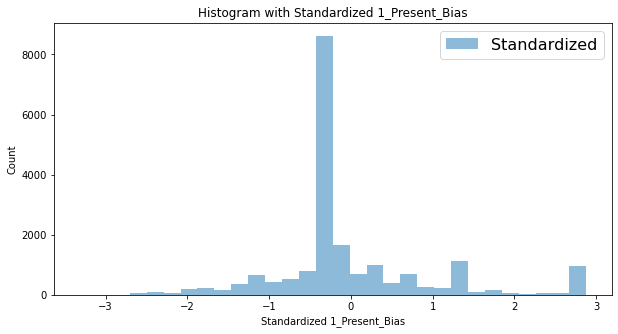

In [238]:
from sklearn.preprocessing import StandardScaler

# Standardize 'durationR'
X_train['1_Present_Bias'] = standardizer.fit_transform(X_train[['1_Present_Bias']])
X_test['1_Present_Bias'] = standardizer.transform(X_test[['1_Present_Bias']])

# Plotting
plt.figure(figsize=(10,5))
plt.hist(X_train['1_Present_Bias'], bins=30, alpha=0.5, label='Standardized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Standardized 1_Present_Bias')
plt.xlabel('Standardized 1_Present_Bias')
plt.ylabel('Count')
plt.show()


In [242]:
print(X_train.shape)
print(X_test.shape)

(19780, 36)
(4945, 36)


## Normalization

In [240]:
def check_non_positive_values(df, column_names):
    for column_name in column_names:
        non_positive_count = (df[column_name] <= 0).sum()
        if non_positive_count > 0:
            print(f"Column '{column_name}' contains {non_positive_count} non-positive values.")
        else:
            print(f"Column '{column_name}' has no non-positive values.")

columns_to_check = ['goalR', 'fundedR']

print("Checking X_train...")
check_non_positive_values(X_train, columns_to_check)

print("\nChecking X_test...")
check_non_positive_values(X_test, columns_to_check)



Checking X_train...
Column 'goalR' has no non-positive values.
Column 'fundedR' has no non-positive values.

Checking X_test...
Column 'goalR' has no non-positive values.
Column 'fundedR' has no non-positive values.


In [241]:
#Box-Cox Transformation
from scipy import stats

X_train.loc[:, 'goalR'] = stats.boxcox(X_train['goalR'])[0]
X_test.loc[:, 'goalR'] = stats.boxcox(X_test['goalR'])[0]

X_train.loc[:, 'fundedR'] = stats.boxcox(X_train['fundedR'])[0]
X_test.loc[:, 'fundedR'] = stats.boxcox(X_test['fundedR'])[0]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [239]:
print(X_train.shape)
print(X_test.shape)

(19780, 36)
(4945, 36)


This normalized range shows that the most important feature contributes up to 10% (or 0.10 when normalized) to the model's predictive accuracy. This is a relatively high contribution in the context of multiple features, indicating that this particular feature plays a significant role in the model's decisions. The highest score being 0.12 means that no single feature overwhelmingly dominates the model's decision-making process; instead, several features contribute to varying degrees.